# Hands-on Lab --- Data Prep

## Importing packages:

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 2)

## Reading comma separated files into dataframes.
## Change the path below to point to churn and margin data:

In [3]:
churn_df = pd.read_csv('~/Documents/fall2019/5753/churn_data.csv')
margin_df = pd.read_csv('~/Documents/fall2019/5753/margin_data.csv')

## Use the head method to view churn dataframe:

In [3]:
churn_df.head()

,ST,Zip,DMA,Area_Cd,emailable,solicit_ph_ind,solicit_email_ind,fixd_incm_flg,scheduled_purchase_flg,months_since_last_trans,...,resp_cnt_36mo,call_in_mo_36mo,call_out_mo_36mo,order_cnt_36mo,tier,tier_prev,acct_ID,activation_date,event_date,churn_year_plus1_ind
0,VA,23464,544,missing,0,0,1,0,0,2,...,0,0,0,1,3-Gold,xxx,B102465045,04JAN04,30JUN15,1
1,NC,27542,560,919,1,1,1,0,0,4,...,0,4,0,8,5-Diamond,3-Gold,B106897643,04JUL04,NaN,0
2,NV,89109,839,702,0,0,1,0,0,8,...,0,0,0,1,1-Bronze,xxx,B111832829,03SEP06,NaN,0
3,OH,43050,535,614,0,1,1,0,0,1,...,0,0,0,6,1-Bronze,xxx,B112883062,03SEP05,NaN,0
4,HI,96789,744,808,1,1,1,0,0,4,...,6,4,0,6,4-Platinum,3-Gold,B113581008,03DEC05,NaN,0


## Use pandas describe method to see variable stats,
##    and transpose to show variables as a list:

In [4]:
print(" summary stats on churn data ") 
print(churn_df.describe(include='all').transpose())

 summary stats on churn data 
                            count unique         top   freq     mean      std  min      25%      50%      75%      max
ST                          73481     59          CA   6649      NaN      NaN  NaN      NaN      NaN      NaN      NaN
Zip                         73481  18361     missing    282      NaN      NaN  NaN      NaN      NaN      NaN      NaN
DMA                         73481    216         803   3013      NaN      NaN  NaN      NaN      NaN      NaN      NaN
Area_Cd                     73481    328     missing   3851      NaN      NaN  NaN      NaN      NaN      NaN      NaN
emailable                 7.3e+04    NaN         NaN    NaN     0.52      0.5    0        0        1        1        1
solicit_ph_ind            7.3e+04    NaN         NaN    NaN     0.89     0.31    0        1        1        1        1
solicit_email_ind         7.3e+04    NaN         NaN    NaN     0.96     0.19    0        1        1        1        1
fixd_incm_flg     

## Use head method to view margin dataframe:

In [5]:
margin_df.head()

,trans_amt_t_minus_00,trans_amt_t_minus_01,trans_amt_t_minus_02,trans_amt_t_minus_03,trans_amt_t_minus_04,trans_amt_t_minus_05,trans_amt_t_minus_06,trans_amt_t_minus_07,trans_amt_t_minus_08,trans_amt_t_minus_09,trans_amt_t_minus_10,trans_amt_t_minus_11,trans_amt_t_minus_12,trans_amt_t_minus_13,trans_amt_t_minus_14,trans_amt_t_minus_15,trans_amt_t_minus_16,trans_amt_t_minus_17,trans_amt_t_minus_18,trans_amt_t_minus_19,trans_amt_t_minus_20,trans_amt_t_minus_21,trans_amt_t_minus_22,trans_amt_t_minus_23,trans_amt_t_minus_24,...,cost_amt_t_minus_11,cost_amt_t_minus_10,cost_amt_t_minus_09,cost_amt_t_minus_08,cost_amt_t_minus_07,cost_amt_t_minus_06,cost_amt_t_minus_05,cost_amt_t_minus_04,cost_amt_t_minus_03,cost_amt_t_minus_02,cost_amt_t_minus_01,cost_amt_t_minus_00,cost_amt_t_plus_01,cost_amt_t_plus_02,cost_amt_t_plus_03,cost_amt_t_plus_04,cost_amt_t_plus_05,cost_amt_t_plus_06,cost_amt_t_plus_07,cost_amt_t_plus_08,cost_amt_t_plus_09,cost_amt_t_plus_10,cost_amt_t_plus_11,cost_amt_t_plus_12,acct_ID
0,0.0,1961.0,6110.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3882.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,600.25,584.71,584.71,584.71,584.71,584.71,584.71,584.71,606.11,592.50,584.71,0.00,0.00,0.00,0.00,0.00,0.30,0.00,0.00,0.00,0.30,0.00,0.00,B102465045
1,0.0,0.0,0.0,40.0,0.0,400.0,200.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,949.0,135.0,...,598.94,598.68,598.68,598.68,599.88,599.58,599.28,598.98,600.05,601.37,601.37,598.98,14.49,14.27,14.76,13.97,15.69,14.87,14.79,14.57,14.27,14.27,14.76,14.53,B106897643
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,8.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.91,2.87,0.00,0.00,0.00,0.00,B111832829
3,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,0.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,2.10,1.50,3.29,1.58,1.83,1.47,4.45,1.40,1.54,3.95,1.16,1.78,4.46,2.10,5.17,1.29,0.26,0.00,0.00,0.00,0.00,0.30,0.00,0.30,B112883062
4,0.0,0.0,0.0,600.0,0.0,0.0,0.0,700.0,300.0,300.0,300.0,300.0,300.0,300.0,2160.0,0.0,0.0,0.0,0.0,0.0,600.0,300.0,0.0,300.0,600.0,...,605.41,604.44,599.99,600.91,604.18,599.21,598.68,599.20,600.05,601.63,598.94,598.98,15.09,14.87,15.06,15.04,15.09,15.94,18.68,15.94,15.30,17.72,15.06,15.90,B113581008


## Modify margin data to only have ANNUAL margin numbers,
##    and print stats on the new margin dataframe:

In [6]:
margin_df['rev_Y_neg_1']=margin_df['trans_amt_t_minus_00']+margin_df['trans_amt_t_minus_01']+margin_df['trans_amt_t_minus_02']+margin_df['trans_amt_t_minus_03']+margin_df['trans_amt_t_minus_04']+margin_df['trans_amt_t_minus_05']+margin_df['trans_amt_t_minus_06']+margin_df['trans_amt_t_minus_07']+margin_df['trans_amt_t_minus_08']+margin_df['trans_amt_t_minus_09']+margin_df['trans_amt_t_minus_10']+margin_df['trans_amt_t_minus_11']
margin_df['cost_Y_neg_1']=margin_df['cost_amt_t_minus_00']+margin_df['cost_amt_t_minus_01']+margin_df['cost_amt_t_minus_02']+margin_df['cost_amt_t_minus_03']+margin_df['cost_amt_t_minus_04']+margin_df['cost_amt_t_minus_05']+margin_df['cost_amt_t_minus_06']+margin_df['cost_amt_t_minus_07']+margin_df['cost_amt_t_minus_08']+margin_df['cost_amt_t_minus_09']+margin_df['cost_amt_t_minus_10']+margin_df['cost_amt_t_minus_11']
margin_df['margin_Y_neg_1']=margin_df['rev_Y_neg_1']-margin_df['cost_Y_neg_1']

margin_df['rev_Y_neg_2']=margin_df['trans_amt_t_minus_12']+margin_df['trans_amt_t_minus_13']+margin_df['trans_amt_t_minus_14']+margin_df['trans_amt_t_minus_15']+margin_df['trans_amt_t_minus_16']+margin_df['trans_amt_t_minus_17']+margin_df['trans_amt_t_minus_18']+margin_df['trans_amt_t_minus_19']+margin_df['trans_amt_t_minus_20']+margin_df['trans_amt_t_minus_21']+margin_df['trans_amt_t_minus_22']+margin_df['trans_amt_t_minus_23']
margin_df['cost_Y_neg_2']=margin_df['cost_amt_t_minus_12']+margin_df['cost_amt_t_minus_13']+margin_df['cost_amt_t_minus_14']+margin_df['cost_amt_t_minus_15']+margin_df['cost_amt_t_minus_16']+margin_df['cost_amt_t_minus_17']+margin_df['cost_amt_t_minus_18']+margin_df['cost_amt_t_minus_19']+margin_df['cost_amt_t_minus_20']+margin_df['cost_amt_t_minus_21']+margin_df['cost_amt_t_minus_22']+margin_df['cost_amt_t_minus_23']
margin_df['margin_Y_neg_2']=margin_df['rev_Y_neg_2']-margin_df['cost_Y_neg_2']

margin_df['rev_Y_neg_3']=margin_df['trans_amt_t_minus_24']+margin_df['trans_amt_t_minus_25']+margin_df['trans_amt_t_minus_26']+margin_df['trans_amt_t_minus_27']+margin_df['trans_amt_t_minus_28']+margin_df['trans_amt_t_minus_29']+margin_df['trans_amt_t_minus_30']+margin_df['trans_amt_t_minus_31']+margin_df['trans_amt_t_minus_32']+margin_df['trans_amt_t_minus_33']+margin_df['trans_amt_t_minus_34']+margin_df['trans_amt_t_minus_35']
margin_df['cost_Y_neg_3']=margin_df['cost_amt_t_minus_24']+margin_df['cost_amt_t_minus_25']+margin_df['cost_amt_t_minus_26']+margin_df['cost_amt_t_minus_27']+margin_df['cost_amt_t_minus_28']+margin_df['cost_amt_t_minus_29']+margin_df['cost_amt_t_minus_30']+margin_df['cost_amt_t_minus_31']+margin_df['cost_amt_t_minus_32']+margin_df['cost_amt_t_minus_33']+margin_df['cost_amt_t_minus_34']+margin_df['cost_amt_t_minus_35']
margin_df['margin_Y_neg_3']=margin_df['rev_Y_neg_3']-margin_df['cost_Y_neg_3']

margin_df['rev_Y_pos_1']=margin_df['trans_amt_t_plus_01']+margin_df['trans_amt_t_plus_02']+margin_df['trans_amt_t_plus_03']+margin_df['trans_amt_t_plus_04']+margin_df['trans_amt_t_plus_05']+margin_df['trans_amt_t_plus_06']+margin_df['trans_amt_t_plus_07']+margin_df['trans_amt_t_plus_08']+margin_df['trans_amt_t_plus_09']+margin_df['trans_amt_t_plus_10']+margin_df['trans_amt_t_plus_11']+margin_df['trans_amt_t_plus_12']
margin_df['cost_Y_pos_1']=margin_df['cost_amt_t_plus_01']+margin_df['cost_amt_t_plus_02']+margin_df['cost_amt_t_plus_03']+margin_df['cost_amt_t_plus_04']+margin_df['cost_amt_t_plus_05']+margin_df['cost_amt_t_plus_06']+margin_df['cost_amt_t_plus_07']+margin_df['cost_amt_t_plus_08']+margin_df['cost_amt_t_plus_09']+margin_df['cost_amt_t_plus_10']+margin_df['cost_amt_t_plus_11']+margin_df['cost_amt_t_plus_12']
margin_df['margin_Y_pos_1']=margin_df['rev_Y_pos_1']-margin_df['cost_Y_pos_1']

margin_df = margin_df[['acct_ID','margin_Y_neg_1','margin_Y_neg_2','margin_Y_neg_3','margin_Y_pos_1']]

print(" summary stats on margin data ") 
print(margin_df.describe(include='all').transpose())

 summary stats on margin data 
                  count unique         top freq     mean      std      min  25%      50%      75%      max
acct_ID           73481  73384  I152642467    3      NaN      NaN      NaN  NaN      NaN      NaN      NaN
margin_Y_neg_1  7.3e+04    NaN         NaN  NaN  2.3e+02  1.6e+03 -1.9e+04   43  1.8e+02  3.4e+02    2e+05
margin_Y_neg_2  7.3e+04    NaN         NaN  NaN  1.9e+02  1.7e+03 -7.7e+03    0  1.2e+02  2.9e+02    2e+05
margin_Y_neg_3  7.3e+04    NaN         NaN  NaN  1.6e+02  1.4e+03 -6.9e+03    0       26  2.4e+02  1.9e+05
margin_Y_pos_1  7.3e+04    NaN         NaN  NaN  3.6e+02  1.7e+03 -2.7e+03 -2.2  1.6e+02  3.3e+02    2e+05


## Create bar chart to explore churn rates by tiers:

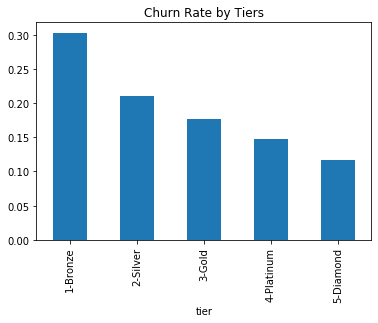

In [7]:
temp_df = churn_df.groupby(['tier'])['churn_year_plus1_ind'].mean()
temp_df.plot.bar(title="Churn Rate by Tiers")

## Create histogram to explore distribution of variables in churn data:

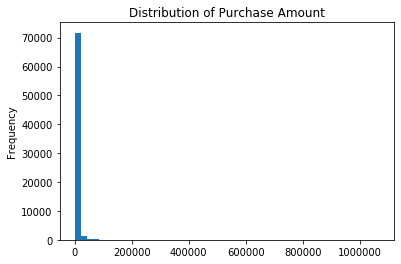

In [8]:
churn_df['purch_amt_life'].plot.hist(title="Distribution of Purchase Amount",bins=50)

## Create histogram to explore distribution of variables in margin data:

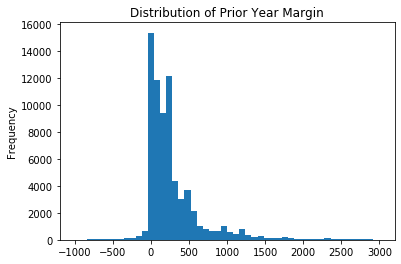

In [9]:
temp_df = margin_df.query('-1000<margin_Y_neg_1<3000')
temp_df['margin_Y_neg_1'].plot.hist(title="Distribution of Prior Year Margin",bins=50)

## Feature engineering on the Churn data:

In [10]:
""" when avg interval = -1 replace with 36 months """
churn_df['purch_avg_interval'].replace([-1], 36, inplace=True)

""" when avg purchase = -1 replace with 0 """
churn_df['purch_avg_36mo'].replace([-1], 0, inplace=True)

churn_df['log_order_cnt_36mo']=np.log10(churn_df['order_cnt_36mo']+1)
churn_df['log_purch_amt_36mo']=np.log10(churn_df['purch_amt_36mo']+1)
churn_df['log_purch_amt_life']=np.log10(churn_df['purch_amt_life']+1)
churn_df['log_purch_avg_36mo']=np.log10(churn_df['purch_avg_36mo']+1)
churn_df['log_purch_cnt_life']=np.log10(churn_df['purch_cnt_life']+1)
churn_df['log_purch_cnt_tt_36mo']=np.log10(churn_df['purch_cnt_tt_36mo']+1)
churn_df['log_resp_cnt_36mo']=np.log10(churn_df['resp_cnt_36mo']+1)

churn_df['perc_purch_cc_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_cc_36mo']/churn_df['purch_cnt_tt_36mo'])
churn_df['perc_purch_ck_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_ck_36mo']/churn_df['purch_cnt_tt_36mo'])
churn_df['perc_purch_et_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_et_36mo']/churn_df['purch_cnt_tt_36mo'])

churn_df = churn_df.drop(['order_cnt_36mo','purch_amt_36mo','purch_amt_life','purch_avg_36mo','purch_cnt_life',
                          'purch_cnt_tt_36mo','resp_cnt_36mo',
                          'purch_cnt_cc_36mo','purch_cnt_ck_36mo','purch_cnt_et_36mo'],axis=1)

print(" summary stats on churn data ") 
print(churn_df.describe(include='all').transpose())

 summary stats on churn data 
                            count unique         top   freq   mean   std  min   25%   50%      75%      max
ST                          73481     59          CA   6649    NaN   NaN  NaN   NaN   NaN      NaN      NaN
Zip                         73481  18361     missing    282    NaN   NaN  NaN   NaN   NaN      NaN      NaN
DMA                         73481    216         803   3013    NaN   NaN  NaN   NaN   NaN      NaN      NaN
Area_Cd                     73481    328     missing   3851    NaN   NaN  NaN   NaN   NaN      NaN      NaN
emailable                 7.3e+04    NaN         NaN    NaN   0.52   0.5    0     0     1        1        1
solicit_ph_ind            7.3e+04    NaN         NaN    NaN   0.89  0.31    0     1     1        1        1
solicit_email_ind         7.3e+04    NaN         NaN    NaN   0.96  0.19    0     1     1        1        1
fixd_incm_flg             7.3e+04    NaN         NaN    NaN  0.092  0.29    0     0     0        0        

## histogram plot on new log variable in Churn data

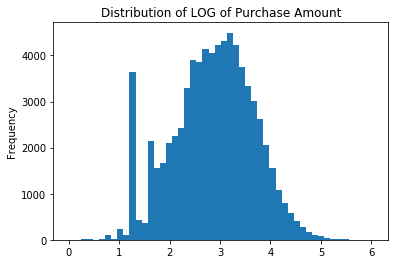

In [11]:
churn_df['log_purch_amt_life'].plot.hist(title="Distribution of LOG of Purchase Amount",bins=50)

## Feature engineering on margin data, while keeping original variables.
## Using logs with an offset that will account for very large negative margins:

In [12]:
margin_df['margin_3yr_avg']=(margin_df['margin_Y_neg_1']+margin_df['margin_Y_neg_2']+margin_df['margin_Y_neg_3'])/3
margin_df['log_margin_Y_neg_1']=np.log10(margin_df['margin_Y_neg_1']+50000)
margin_df['log_margin_Y_neg_2']=np.log10(margin_df['margin_Y_neg_2']+50000)
margin_df['log_margin_Y_neg_3']=np.log10(margin_df['margin_Y_neg_3']+50000)
margin_df['log_margin_3yr_avg']=np.log10(margin_df['margin_3yr_avg']+50000)
margin_df['log_margin_Y_pos_1']=np.log10(margin_df['margin_Y_pos_1']+50000)

## Histogram on transformed target for Margin data

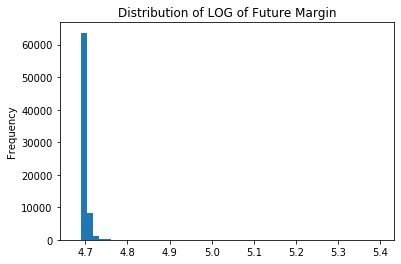

In [13]:
margin_df['log_margin_Y_pos_1'].plot.hist(title="Distribution of LOG of Future Margin",bins=50)

## Scatter plot on Future Margin vs Prior Margin (logarithms):

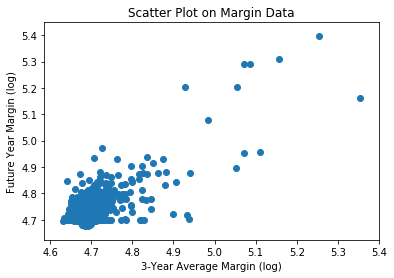

In [14]:
plt.scatter(margin_df['log_margin_3yr_avg'], margin_df['log_margin_Y_pos_1'])
plt.xlabel("3-Year Average Margin (log)")
plt.ylabel("Future Year Margin (log)")
plt.title("Scatter Plot on Margin Data")
print(" ") 
plt.show()

## Eliminating duplicate acct_IDs before joining data:

In [15]:
churn_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
churn_df.shape

(73384, 31)

In [16]:
margin_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
margin_df.shape

(73384, 11)

## Join Churn and Margin data by acct_ID:

In [17]:
combined_df = pd.merge(churn_df, margin_df, on='acct_ID', how='inner')
combined_df.shape

(73384, 41)

## Create dummy variables for certain categorical variables.

In [18]:
""" WARNING: this commented-out approach would create dummy indicators for all """
"""    categorical variables, including those with very high cardinality, such as zip codes """
"""    and also would drop the original categorical variables and only keep the dummy indicators """

""" combined_df = pd.get_dummies(combined_df) """

""" this approach hand-picks only certain variables for which to create dummy indicators """
""" and keeps the original variables too """

for column in ['ST', 'tier', 'tier_prev']:
    dummies = pd.get_dummies(combined_df[column],prefix=column)
    combined_df[dummies.columns] = dummies

print(" ") 
print("New dataset with dummies") 
print(" ") 
print(combined_df.head(10)) 
print(" ") 
print("Columns in new data")
print(" ") 
print(combined_df.dtypes)

 
New dataset with dummies
 
   ST    Zip  DMA  Area_Cd  emailable  solicit_ph_ind  solicit_email_ind  fixd_incm_flg  scheduled_purchase_flg  months_since_last_trans  months_since_first_trans  purch_avg_interval  mail_cnt_36mo  call_in_mo_36mo  call_out_mo_36mo        tier  tier_prev     acct_ID activation_date event_date  churn_year_plus1_ind  log_order_cnt_36mo  log_purch_amt_36mo  log_purch_amt_life  log_purch_avg_36mo  ...  ST_RI  ST_SC  ST_SD  ST_TN  ST_TX  ST_UT  ST_VA  ST_VI  ST_VT  ST_WA  ST_WI  ST_WV  ST_WY  ST_missing  tier_1-Bronze  tier_2-Silver  tier_3-Gold  tier_4-Platinum  tier_5-Diamond  tier_prev_1-Bronze  tier_prev_2-Silver  tier_prev_3-Gold  tier_prev_4-Platinum  tier_prev_5-Diamond  tier_prev_xxx
0  VA  23464  544  missing          0               0                  1              0                       0                        2                       128                2.93              4                0                 0      3-Gold        xxx  B102465045       

## export updated data as new csv file

In [19]:
combined_df.to_csv('~/Documents/fall2019/5753/combined_data.csv',index=False)